0.0
1.0
0.24197072451914337


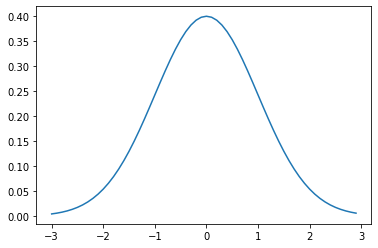

In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# loc는 평균, scale은 표준편차. 0/1로 각각 두면 표준정규분포
sn = stats.norm(loc=0, scale=1)
print(sn.mean())
print(sn.std())
print(sn.pdf(x=1))

x_plot = np.arange(-3.0, 3.0, 0.1)
plt.plot(x_plot, stats.norm.pdf(loc=0, scale=1, x=x_plot))

<AxesSubplot:ylabel='Density'>

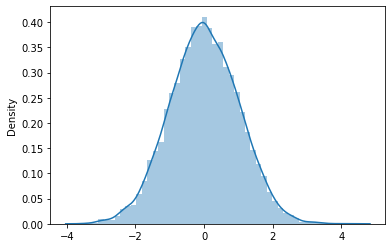

In [6]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sn = stats.norm.rvs(loc=0, scale=1, size=10000)
sn.mean()
sn.std()
sns.distplot(sn)

<AxesSubplot:ylabel='Density'>

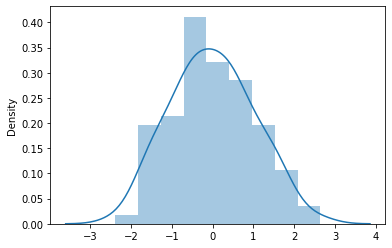

In [8]:
# () 안에 들어가는 샘플의 갯수를 늘릴수록 모수인 표준정규분포에 가까워진다.
# 샘플을 많이 뽑을수록 모수에 대한 설명을 더 잘 할 수 있음.

nr = np.random.randn(100)
sns.distplot(nr)

<AxesSubplot:>

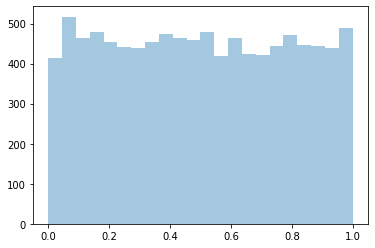

In [9]:
# np.random.rand - 0~1 사이의 랜덤한 숫자를 뽑아 주는 함수
nr1 = np.random.rand(10000)
# kde = 히스토그램에 그려지는 선
sns.distplot(nr1, kde=False)

In [11]:
#            100행 1열
np.random.rand(100,1)

array([[0.20747008],
       [0.42468547],
       [0.37416998],
       [0.46357542],
       [0.27762871],
       [0.58678435],
       [0.86385561],
       [0.11753186],
       [0.51737911],
       [0.13206811],
       [0.71685968],
       [0.3960597 ],
       [0.56542131],
       [0.18327984],
       [0.14484776],
       [0.48805628],
       [0.35561274],
       [0.94043195],
       [0.76532525],
       [0.74866362],
       [0.90371974],
       [0.08342244],
       [0.55219247],
       [0.58447607],
       [0.96193638],
       [0.29214753],
       [0.24082878],
       [0.10029394],
       [0.01642963],
       [0.92952932],
       [0.66991655],
       [0.78515291],
       [0.28173011],
       [0.58641017],
       [0.06395527],
       [0.4856276 ],
       [0.97749514],
       [0.87650525],
       [0.33815895],
       [0.96157015],
       [0.23170163],
       [0.94931882],
       [0.9413777 ],
       [0.79920259],
       [0.63044794],
       [0.87428797],
       [0.29302028],
       [0.848

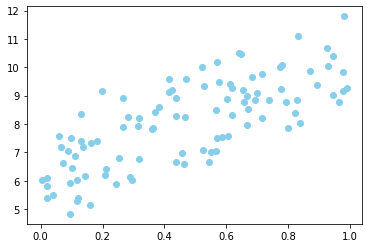

In [10]:
import pandas as pd

np.random.seed(0)
X = np.random.rand(100, 1)
# 브로드캐스트(행렬의 모든 원소에 특정 값이 곱해짐.)
# scatter를 그리기 위해 randn으로 오차를 줬는데, randn은 정규분포
y = 6 + 4*X + np.random.randn(100, 1) # 1차방정식
plt.scatter(X, y, c='skyblue')

경사하강 - 교재 294~ 300p

[비용 최소화]


- 비용함수 R(w)는 변수가 w 파라미터로 이뤄진 함수이며 R(w)를 최소화하는 w0와 w1의 값은 R(w)를 w1, w1으로 순차적으로 편미분해서 얻을 수 있다.

    w1 편미분값: -2/N * sigma x * diff
    
    w0 편미분값: -2/N * sigma * diff
    
    
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결과값을 마이너스하며 적용한다.
- 편미분값이 너무 클 수 있기 때문에 보정 계수를 곱하는데, 이를 학습률이라고 한다.

In [12]:
# w1과 w0을 업데이트 할 w1_update, w0_update를 반환하는 사용자 함수 생성.

def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0
    # diff는 오차(잔차)
    diff = y - y_pred
    w0_factors = np.ones((N, 1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    return w1_update, w0_update

In [13]:
# 반복적으로 경사 하강법을 이용하여 get_weight_updates()를 호출하여 w1, w0을
# 업데이트하는 함수 생성
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1, w0을 업데이트 적용함.

def gradient_descent_steps(X, y, iters=10000):
    # w0, w1을 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [15]:
# 예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)

print("w1:{0:.4f}, w0:{1:.4f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('GD Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:3.7740, w0:6.3047
GD Total Cost:0.9947


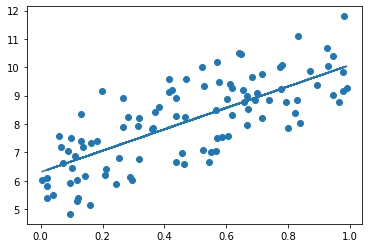

In [16]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [21]:
# 확률적 경사하강법: '대용량 데이터의 경우' 일부 데이터만 이용해 w가 업데이트되는 값을 계산.
# 경사 하강법에 비해 빠른 속도를 보장한다.
# 미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출

def stochastic_gradient_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    return w1, w0

In [22]:
w1, w0 = stochastic_gradient_steps(X, y, iters=1000)
print('w1:',round(w1[0,0],3), ' w1:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('SGD Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 3.79  w1: 6.291
SGD Total Cost:0.9942
